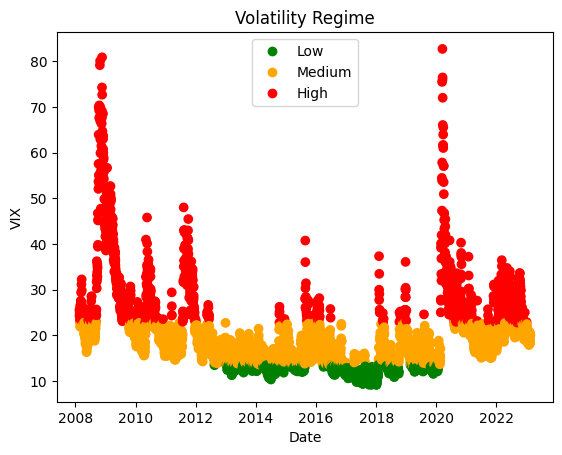

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
data = pd.read_csv('VIX Index.csv')

# convert the date string to a datetime object which makes the plot look nice
data['Date'] = pd.to_datetime(data['Date'])


# column for the clusters using conditionals
bins = [0,13.54,22.785,np.inf]
labels = ['Low','Medium', 'High']
data['Volatility Regime'] = pd.cut(data['Last Price'], bins=bins, labels=labels)

fig, ax = plt.subplots()
colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
ax.scatter(data['Date'], data['Last Price'], c=data['Volatility Regime'].apply(lambda x: colors[x]))
ax.set_xlabel('Date')
ax.set_ylabel('VIX')
ax.set_title('Volatility Regime')
ax.legend(handles=[plt.Line2D([],[],color='green',marker='o',linestyle=''),
                   plt.Line2D([],[],color='orange',marker='o',linestyle=''),
                   plt.Line2D([],[],color='red',marker='o',linestyle='')],
          labels=labels,
          loc='best')

plt.show()

In [2]:
data

,id,Date,CURRENCY,Last Price,Return,Cumulative Log Return,Volatility Regime
0,VIX Index,2008-02-19,USD,25.59,NaN,NaN,High
1,VIX Index,2008-02-20,USD,24.40,-0.047619,-0.047619,High
2,VIX Index,2008-02-21,USD,25.12,0.029081,-0.018537,High
3,VIX Index,2008-02-22,USD,24.06,-0.043114,-0.061651,High
4,VIX Index,2008-02-25,USD,23.03,-0.043753,-0.105404,High
...,...,...,...,...,...,...,...
3779,VIX Index,2023-02-13,USD,20.34,-0.009298,-0.229612,High
3780,VIX Index,2023-02-14,USD,18.91,-0.072899,-0.302511,Low
3781,VIX Index,2023-02-15,USD,18.23,-0.036622,-0.339133,Low
3782,VIX Index,2023-02-16,USD,20.17,0.101128,-0.238005,High


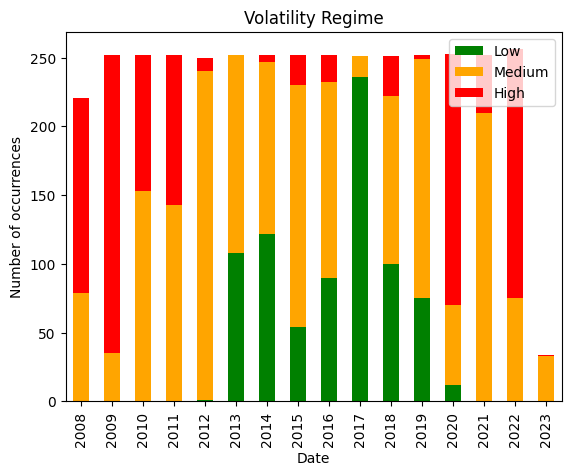

In [9]:
bins = [0,13.54,22.785,np.inf]
labels = ['Low','Medium', 'High']
data['Volatility Regime'] = pd.cut(data['Last Price'], bins=bins, labels=labels)

data['Year'] = data['Date'].dt.year
# group the data by date and volatility regime and count the number of occurrences
grouped_data = data.groupby(['Year', 'Volatility Regime'])['Volatility Regime'].count().unstack()

# plot a stacked bar chart using the grouped data
ax = grouped_data.plot.bar(stacked=True, color=['green','orange', 'red'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of occurrences')
ax.set_title('Volatility Regime')
ax.legend(labels=labels, loc='best')

plt.show()

/tmp/ipykernel_32438/1263148938.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Volatility Regime'] == 'High']['Last Price'], shade=True, label='High')
/tmp/ipykernel_32438/1263148938.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Volatility Regime'] == 'Medium']['Last Price'], shade=True, label='Medium')
/tmp/ipykernel_32438/1263148938.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Volatility Regime'] == 'Low']['Last Price'], shade=True, label='Low')


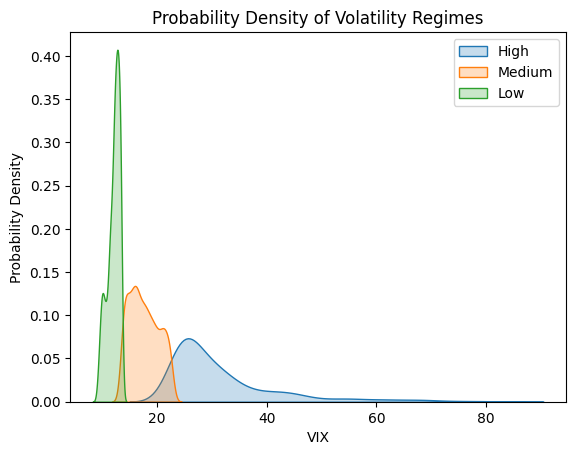

In [12]:
import seaborn as sns

sns.kdeplot(data[data['Volatility Regime'] == 'High']['Last Price'], shade=True, label='High')
sns.kdeplot(data[data['Volatility Regime'] == 'Medium']['Last Price'], shade=True, label='Medium')
sns.kdeplot(data[data['Volatility Regime'] == 'Low']['Last Price'], shade=True, label='Low')

plt.xlabel('VIX')
plt.ylabel('Probability Density')
plt.title('Probability Density of Volatility Regimes')
plt.legend()
plt.show()